## K-means clustering

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ 3.65439218,  9.72062839],
       [ 7.33993887, 10.129969  ],
       [ 6.00482068,  8.0088082 ],
       ...,
       [-6.93606036,  2.69959054],
       [ 5.33720389,  9.64300245],
       [ 6.36548155, 10.61148135]])

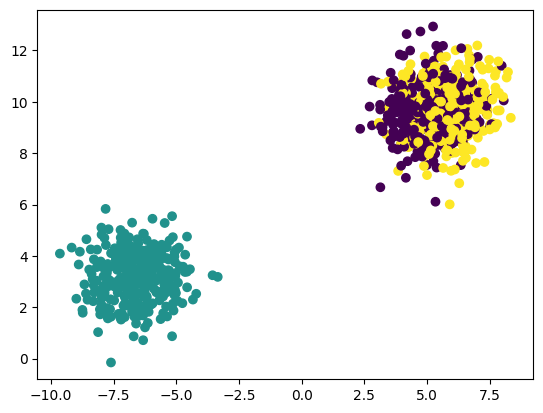

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [6]:
from sklearn.cluster import KMeans

In [7]:
## elbow method to select k value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/clust

In [8]:
wcss

[29794.20606084048,
 1409.3711490357607,
 1088.543877447329,
 895.9293026488187,
 727.2221978322189,
 625.8159946857577,
 532.2933216848681,
 474.8198975935061,
 431.85287747590434,
 394.30704923738216]

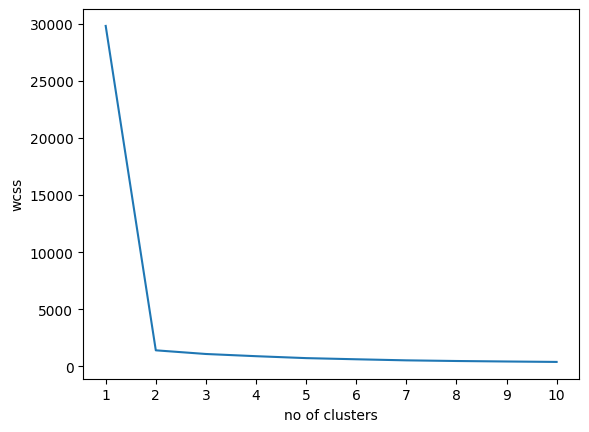

In [9]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [10]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [11]:
ylbl=kmeans.fit_predict(X_train)

/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


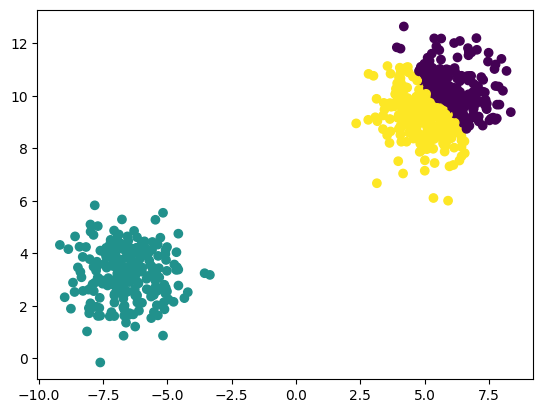

In [12]:
plt.scatter(X_train[:,0],X_train[:,1],c=ylbl)

In [13]:
## knee locater
!pip install kneed

In [14]:
from kneed import KneeLocator

In [15]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

2

In [16]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [17]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/clust

In [18]:
silhouette_coefficients

[0.8667995051591528,
 0.5055041069824637,
 0.5172542028112764,
 0.33080614465119507,
 0.3412622614410658,
 0.33597038710947996,
 0.33526770625758273,
 0.34046649830968734,
 0.3299721314964774]

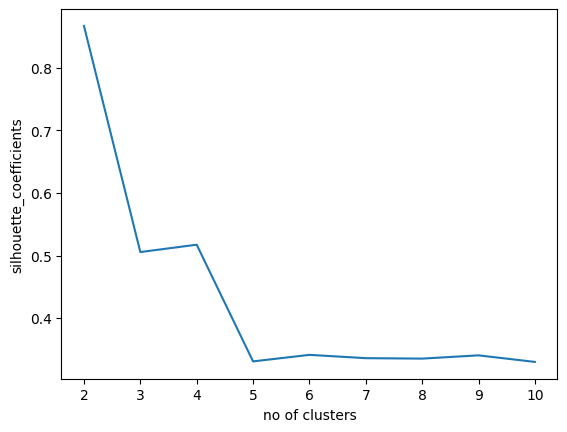

In [19]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('no of clusters')
plt.ylabel('silhouette_coefficients')
plt.show()

## Hierarichal clustering

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [21]:
iris=datasets.load_iris()

In [22]:
iris_data=pd.DataFrame(iris.data)

In [23]:
iris_data.columns=iris.feature_names

In [24]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [26]:
X_scaled=scaler.fit_transform(iris_data)

In [27]:
X_scaled.shape

(150, 4)

In [28]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [29]:
pca_scaled=pca.fit_transform(X_scaled)

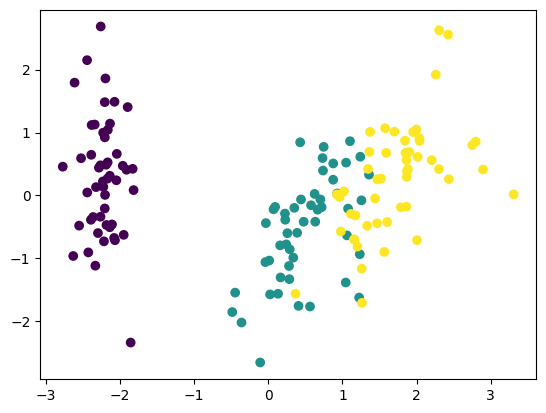

In [30]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=iris.target)

Text(0.5, 0, 'sample index')

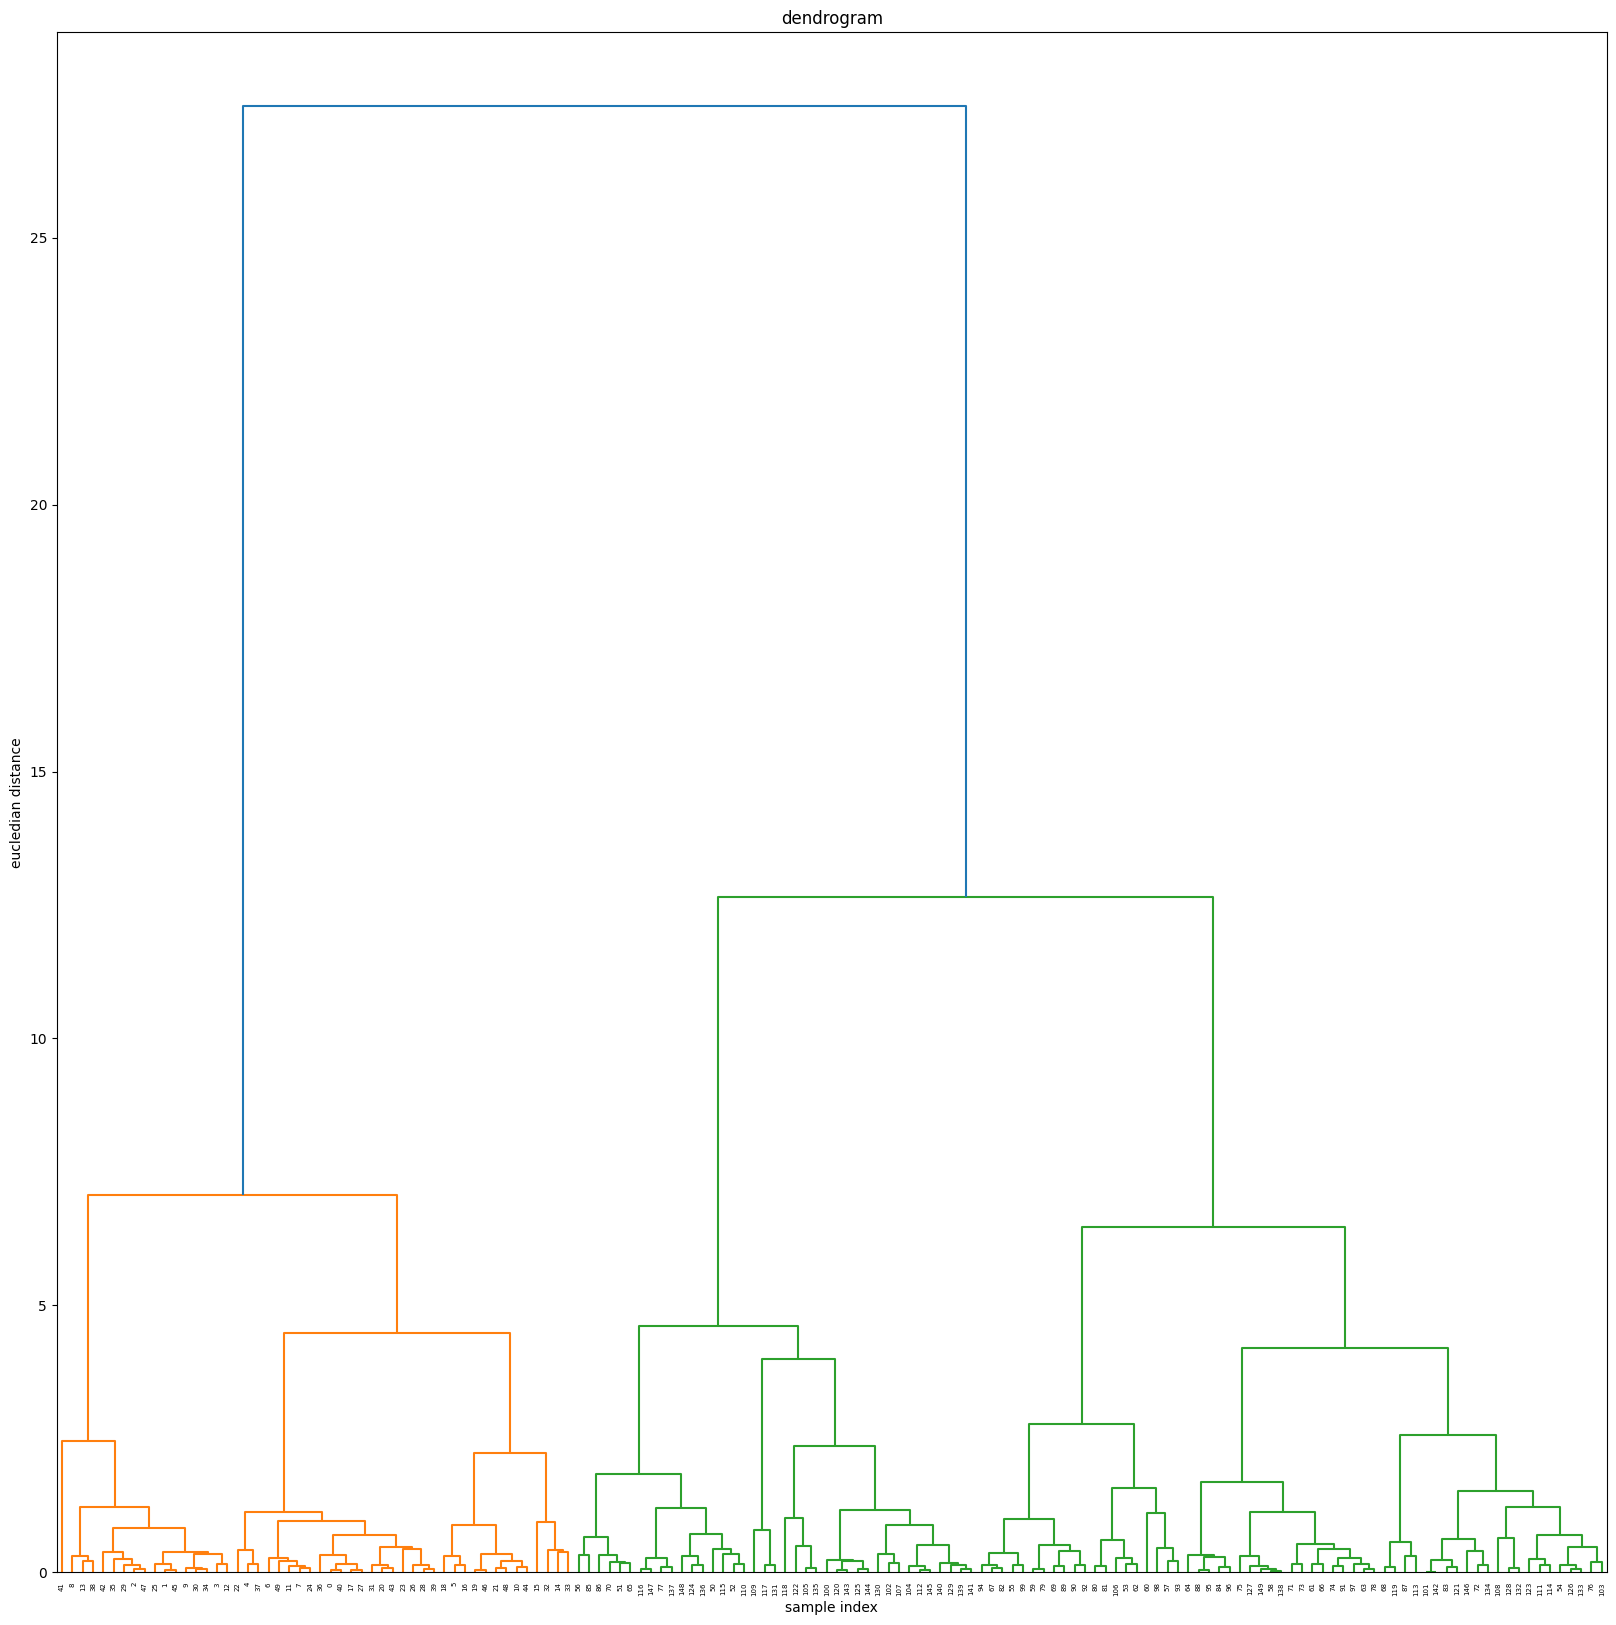

In [31]:
## to construct dendogram
import scipy.cluster.hierarchy as sc

plt.figure(figsize=(20,20))
plt.title('dendrogram')
##crete dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.ylabel('eucledian distance')
plt.xlabel('sample index')

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
aglcl=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [34]:
aglcl.fit(pca_scaled)

/config/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [35]:
aglcl.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

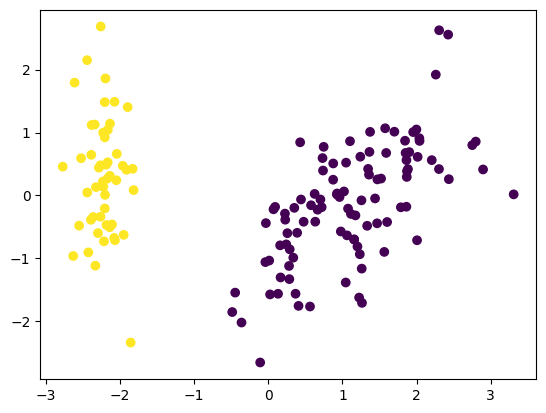

In [36]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=aglcl.labels_)

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
silhouette_coeffients=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score=silhouette_score(X_scaled,agglo.labels_)
    silhouette_coeffients.append(score)

/config/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 

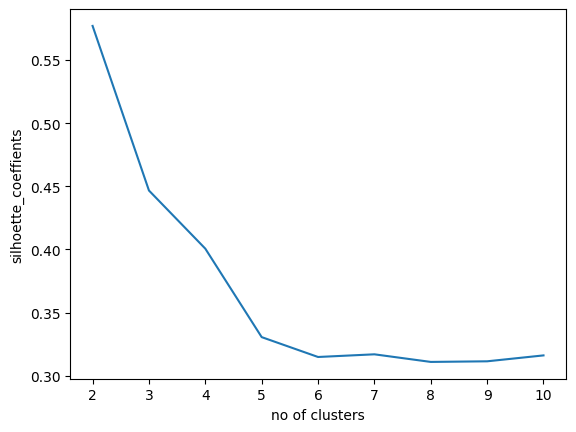

In [39]:
plt.plot(range(2,11),silhouette_coeffients)
plt.xticks(range(2,11))
plt.xlabel('no of clusters')
plt.ylabel('silhoette_coeffients')
plt.show()

## DBscan clustering

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [41]:
X,y=make_moons(n_samples=250,noise=0.01)

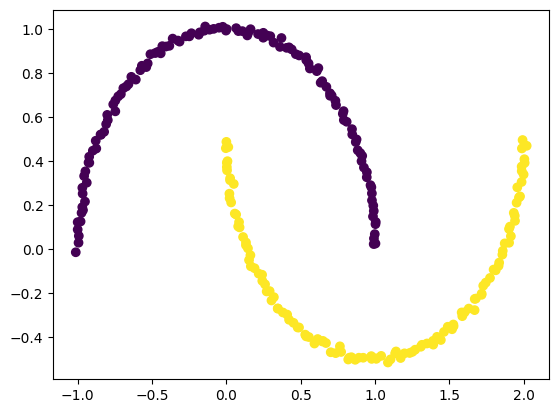

In [42]:
plt.scatter(X[:,0],X[:,1],c=y)

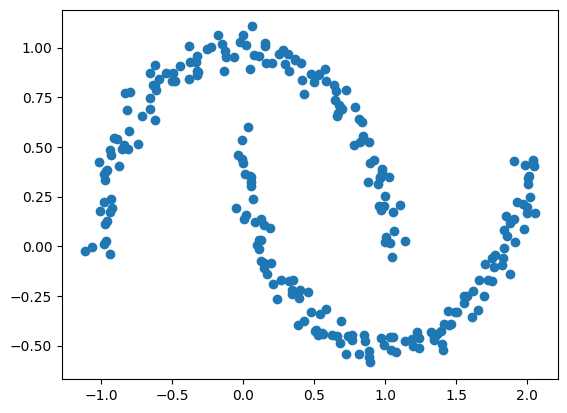

In [43]:
X,y=make_moons(n_samples=250,noise=0.05)
plt.scatter(X[:,0],X[:,1])

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [46]:
db=DBSCAN(eps=0.3)
db.fit(X_scaled)

DBSCAN(eps=0.3)

In [47]:
db.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1])

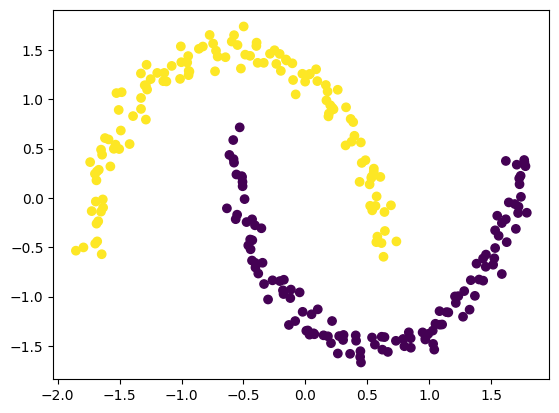

In [48]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=db.labels_)

In [49]:
from sklearn.metrics import silhouette_score

In [50]:
silhat_coefficient=[]
for k in range(2,11):
    db=DBSCAN(eps=0.3)
    db.fit(X_scaled)
    score=silhouette_score(X_scaled,db.labels_)
    silhat_coefficient.append(score)
    

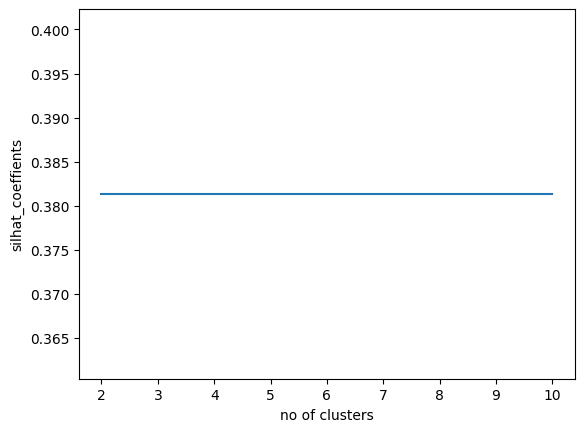

In [51]:
plt.plot(range(2,11),silhat_coefficient)
plt.xticks(range(2,11))
plt.xlabel('no of clusters')
plt.ylabel('silhat_coeffients')
plt.show()